In [1]:
#Install libraries for plotting territories, states, counties
import requests
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
# Send GET request to the API
response = requests.get("https://native-land.ca/api/index.php?maps=languages,territories")  ## NQ changed this URL to include languages,territories

# The API returns a list of features
features = response.json()

# Filter out features with inconsistent coordinate dimensionality
filtered_features = []
for feature in features:
    try:
        # Attempt to construct a shapely shape from the geometry
        shape(feature['geometry'])
        filtered_features.append(feature)
    except ValueError:
        # If the shape construction fails due to a ValueError, skip this feature
        pass

# Wrap filtered features in a dictionary to create a valid GeoJSON
data_geojson = {"type": "FeatureCollection", "features": filtered_features}

In [4]:
# Convert the GeoJSON to a GeoDataFrame
ocheti_sakowin = gpd.GeoDataFrame.from_features(data_geojson)

# Filter for Ocheti Sakowin (NOTE: NQ changed name of variable to oss_data_for_plot)
oss_gdf = ocheti_sakowin[ocheti_sakowin['Name'] == "Očhéthi Šakówiŋ"]
print(oss_gdf['description'])

2016    https://native-land.ca/maps/territories/oceti-...
Name: description, dtype: object


In [11]:
# Calculate the bounding box
bbox = oss_gdf.total_bounds ##NOTE: NQ changed the bounding box to include Očhéthi Šakówiŋ
xmin, ymin, xmax, ymax = bbox

In [13]:
# Convert the GeoJSON to a GeoDataFrame
lakota_lands = gpd.GeoDataFrame.from_features(data_geojson)

# Filter data for Lakȟótiyapi (Lakota) (NOTE: NQ changed name of variable to lak_data_for_plot)
lak_gdf = lakota_lands[lakota_lands["Name"] == "Lakȟótiyapi (Lakota)"]
print(lak_gdf["description"].values)

['https://native-land.ca/maps/languages/lakotayapi/']


In [14]:
# Download state data using cenpy and read into GeoDataFrame
state_url = "https://www2.census.gov/geo/tiger/TIGER2022/STATE/tl_2022_us_state.zip"
states_gdf = gpd.read_file(state_url)

# Download county data using cenpy and read into GeoDataFrame
county_url = "https://www2.census.gov/geo/tiger/TIGER2022/COUNTY/tl_2022_us_county.zip"
counties_gdf = gpd.read_file(county_url)


/tmp/ipykernel_5944/3497595392.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


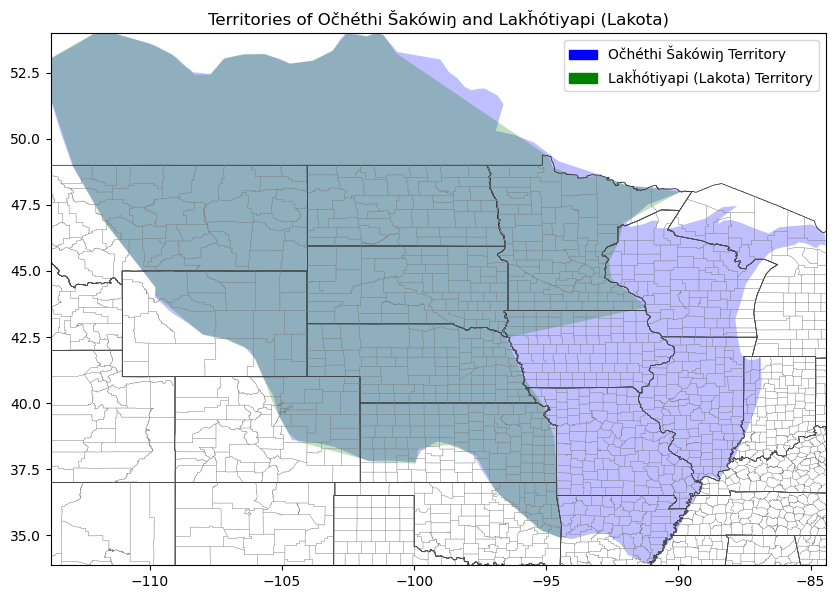

In [25]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
states_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5)
counties_gdf.boundary.plot(ax=ax, color="grey", linewidth=0.2)
oss_gdf.plot(color='blue', ax=ax, alpha=0.25, label='Očhéthi Šakówiŋ Territory')
lak_gdf.plot(color='green', ax=ax, alpha=0.25, label='Lakȟótiyapi (Lakota) Territory') ## NOTE: NQ added extra line to plot both Očhéthi Šakówiŋ & Lakȟótiyapi

# Add a legend
ax.legend()

# Setting the bounds
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# Adding title
plt.title("Territories of Očhéthi Šakówiŋ and Lakȟótiyapi (Lakota)")

# Define labels for the legend
oss_label = 'Očhéthi Šakówiŋ Territory'  # Define the label for Očhéthi Šakówiŋ
lak_label = 'Lakȟótiyapi (Lakota) Territory'  # Define the label for Lakȟótiyapi

# Creating custom legend handles and adding legend
oss_patch = mpatches.Patch(color='blue', label=oss_label)
lak_patch = mpatches.Patch(color='green', label=lak_label)
plt.legend(handles=[oss_patch, lak_patch])

plt.show()
